In [ ]:
# importing
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from google.colab import drive
from tensorflow.keras.layers.experimental import preprocessing
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read dataframe
column_names = ["MPG", "Cylinders", "Displacement", "HorsePower", "Weight", "Accelartion", "Model year", "Origin"]
dataset = pd.read_csv("/content/drive/MyDrive/auto-mpg - auto-mpg - auto-mpg - auto-mpg.csv", names=column_names, na_values='?', comment="\t",
                       )

In [ ]:
dataset

,MPG,Cylinders,Displacement,HorsePower,Weight,Accelartion,Model year,Origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1
394,44.0,4,97.0,52.0,2130,24.6,82,2
395,32.0,4,135.0,84.0,2295,11.6,82,1
396,28.0,4,120.0,79.0,2625,18.6,82,1


In [ ]:
def plot(feature, x=None, y=None):
  plt.figure(figsize=(10, 9))
  plt.scatter(X_train[feature], y_train, label="Data")
  if x is not None and y is not None:
    plt.scatter(x,y,color="r",label="Prediction")
  plt.xlabel(feature)
  plt.ylabel("MPG")
  plt.legend()

In [ ]:
# Clean data
dataset = dataset.dropna()
#                                                 NORMALIZE

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["MPG", "Cylinders", "Displacement", "HorsePower", "Weight", "Accelartion", "Model year"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["Origin"])
)

# Create X & y
X = dataset
y = dataset["MPG"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [ ]:
# What does our data look like:
X_train_normal

array([[0.25531915, 0.6       , 0.4025974 , ..., 1.        , 0.        ,
        0.        ],
       [0.42553191, 0.2       , 0.18181818, ..., 1.        , 0.        ,
        0.        ],
       [0.2393617 , 0.6       , 0.26233766, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.39361702, 0.2       , 0.21038961, ..., 1.        , 0.        ,
        0.        ],
       [0.55585106, 0.2       , 0.07272727, ..., 1.        , 0.        ,
        0.        ],
       [0.05319149, 1.        , 0.85714286, ..., 1.        , 0.        ,
        0.        ]])

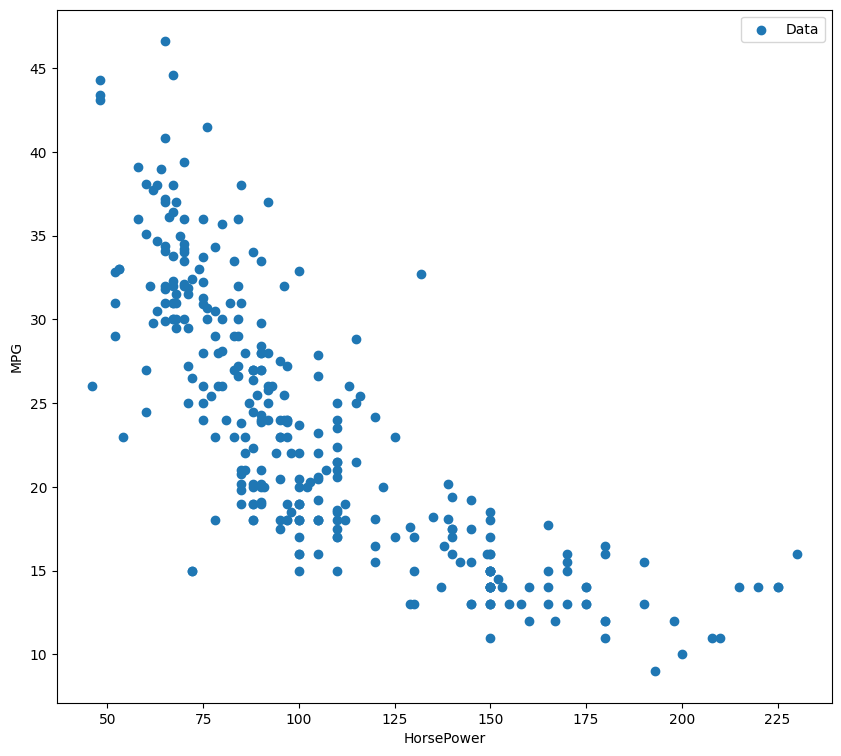

In [ ]:
plot("HorsePower")

In [ ]:
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(X_train))
# Lets normalize a single feature
feature = "HorsePower"
single_feature = np.array(X_train[feature])
print(single_feature.shape, X_train.shape)
single_normal = preprocessing.Normalization()



(313,) (313, 8)


In [ ]:
# Our data has been normalized and one hot encoded now lets build our nerual network
feature = "HorsePower"
# Build a neural network
tf.random.set_seed(42)

dataset_single_model_normal = tf.keras.Sequential([
    single_normal,
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
    ])

dataset_single_model_normal.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit the model
history = dataset_single_model_normal.fit(X_train[feature], y_train, epochs=100,  verbose=1)

Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 15.2550 - mae: 15.2550
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 12.4344 - mae: 12.4344
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 12.5410 - mae: 12.5410
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 12.4110 - mae: 12.4110
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 12.2861 - mae: 12.2861
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 12.2628 - mae: 12.2628
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 12.1024 - mae: 12.1024
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 12.2347 - mae: 12.2347
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 12.1752 - mae: 12.1752
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 12.1893 - mae: 12.1893
Epoch 11/100
10/10 [===================

7/7 [==============================] - 0s 2ms/step


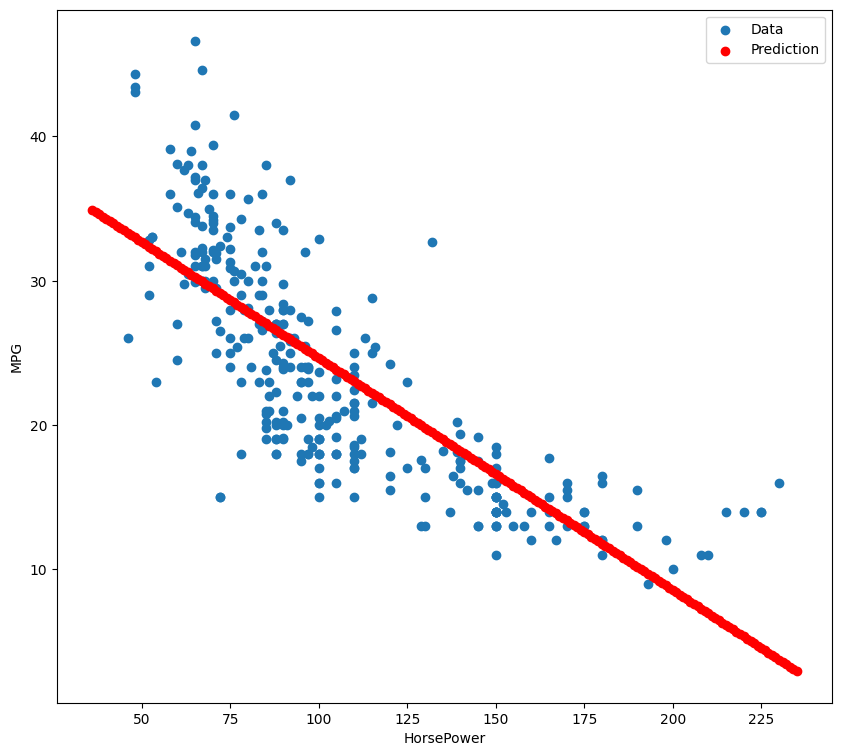

In [ ]:
rangemin = np.min(X_test[feature]) - 10
rangemax = np.max(X_test[feature]) + 10
x = tf.linspace(rangemin, rangemax, 200)
plot(feature, x,dataset_single_model_normal.predict(x))

Text(0.5, 0, 'epochs')

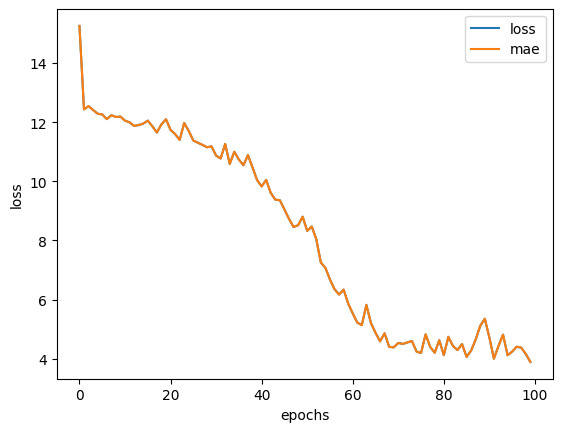

In [ ]:
# Plot history (loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
# Our data has been normalized and one hot encoded now lets build our nerual network
feature = "HorsePower"
# Build a neural network
tf.random.set_seed(42)

dataset_single_model_normal = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
    ])

dataset_single_model_normal.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(lr=0.1),
                metrics=["mae"])

# 3. Fit the model
history = dataset_single_model_normal.fit(X_train[feature], y_train, epochs=100, verbose=1)

Epoch 1/100
10/10 [==============================] - 1s 5ms/step - loss: 16.4772 - mae: 16.4772
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 12.2081 - mae: 12.2081
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 12.7289 - mae: 12.7289
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 12.2984 - mae: 12.2984
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 12.3318 - mae: 12.3318
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 12.3146 - mae: 12.3146
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 12.2863 - mae: 12.2863
Epoch 8/100
10/10 [==============================] - 0s 4ms/step - loss: 12.3405 - mae: 12.3405
Epoch 9/100
10/10 [==============================] - 0s 4ms/step - loss: 12.2555 - mae: 12.2555
Epoch 10/100
10/10 [==============================] - 0s 4ms/step - loss: 12.1816 - mae: 12.1816
Epoch 11/100
10/10 [===================

7/7 [==============================] - 0s 2ms/step


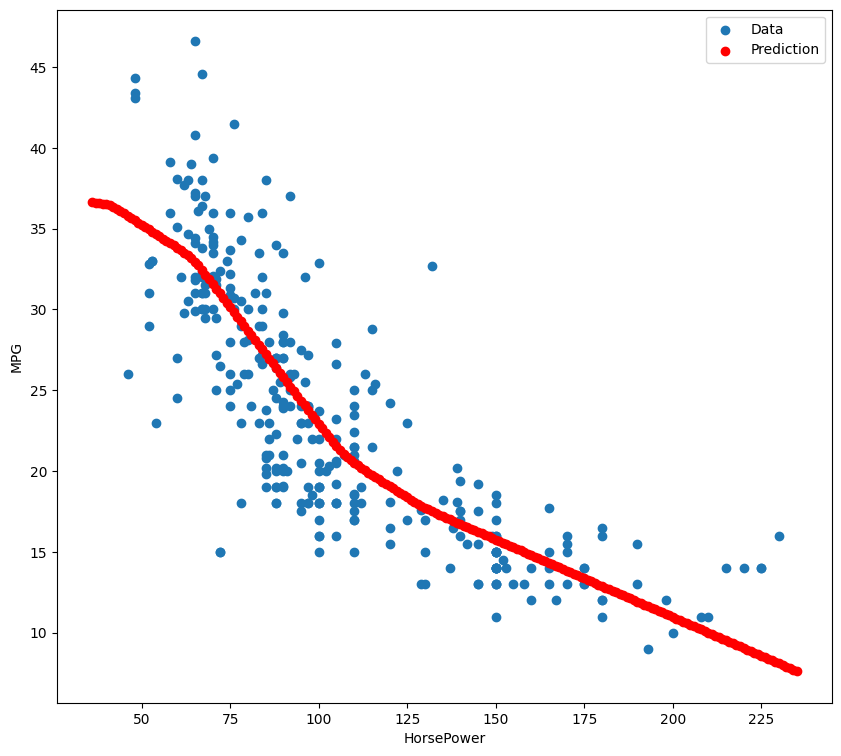

In [ ]:
rangemin = np.min(X_test[feature]) - 10
rangemax = np.max(X_test[feature]) + 10
x = tf.linspace(rangemin, rangemax, 200)
plot(feature, x,dataset_single_model_normal.predict(x))

In [ ]:
# Evaulaute the train model with all the features
tf.random.set_seed(42)

dataset_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)])

dataset_model.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit the model
history = dataset_model.fit(X_train_normal, y_train, epochs=200)

Epoch 1/200
10/10 [==============================] - 3s 12ms/step - loss: 23.2523 - mae: 23.2523
Epoch 2/200
10/10 [==============================] - 0s 7ms/step - loss: 21.9957 - mae: 21.9957
Epoch 3/200
10/10 [==============================] - 0s 6ms/step - loss: 20.5215 - mae: 20.5215
Epoch 4/200
10/10 [==============================] - 0s 7ms/step - loss: 18.6348 - mae: 18.6348
Epoch 5/200
10/10 [==============================] - 0s 6ms/step - loss: 16.1032 - mae: 16.1032
Epoch 6/200
10/10 [==============================] - 0s 7ms/step - loss: 13.0574 - mae: 13.0574
Epoch 7/200
10/10 [==============================] - 0s 10ms/step - loss: 10.7261 - mae: 10.7261
Epoch 8/200
10/10 [==============================] - 0s 6ms/step - loss: 9.5298 - mae: 9.5298
Epoch 9/200
10/10 [==============================] - 0s 10ms/step - loss: 8.6532 - mae: 8.6532
Epoch 10/200
10/10 [==============================] - 0s 8ms/step - loss: 7.7750 - mae: 7.7750
Epoch 11/200
10/10 [======================

In [ ]:
# Evaulate the test data
dataset_model.evaluate(X_test_normal, y_test)

3/3 [==============================] - 0s 5ms/step - loss: 0.0347 - mae: 0.0347


[0.03473507612943649, 0.03473507612943649]

Text(0.5, 0, 'epochs')

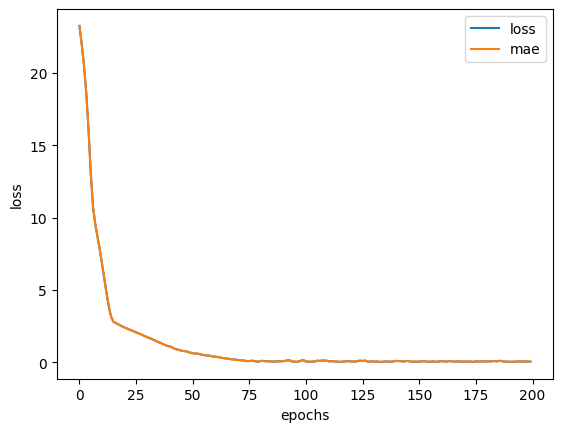

In [ ]:
# Plot history (loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")